# --- Studi Kasus --- SMKN 1 Surabaya

### - Mencari pola yang berpengaruh ke pembelian iphone, bisa terdiri dari beberapa kolom
### - Memberi saran untuk periklanan bagi bisnis berdasarkan pola yang ditemukan
### - Pengelompokan customer dari pola data yang ditemukan

# A. Importing dan EDA

In [172]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
df = pd.read_csv('iphone_purchase_records.csv')
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


## Statistical Summary

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [175]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [176]:
df.duplicated().sum()

np.int64(20)

In [177]:
df[df.duplicated()]

,Gender,Age,Salary,Purchase Iphone
74,Male,32,18000,0
94,Female,29,83000,0
186,Female,20,82000,0
192,Male,29,43000,0
231,Male,39,42000,0
236,Male,40,57000,0
256,Female,41,72000,0
257,Male,40,57000,0
312,Female,38,50000,0
322,Male,41,52000,0


In [178]:
df['Purchase Iphone'].value_counts()

Purchase Iphone
0    257
1    143
Name: count, dtype: int64

## Insights:

### 1. **Kolom Gender belum dilakukan mapping** / LabelEncoding, sementara Purchase Iphone sudah.
### 2. Hanya ada **dua kolom numerik**, dan keduanya **continuous** (**Salary** & **Age**)
### 3. Datanya memiliki input yang sedikit dengan 400 kolom saja, jadi penghapusan data harus dipertimbangkan
### 4. Terdapat duplikat data, namun karena bentuk data yang simpel, kami memutuskan untuk tetap memasukkan data karena duplikat ini bisa saja terjadi karena kurang kolom yang membedakan beberapa baris (data terlalu simpel jadi terbaca sebagai duplikat)

## Visualisasi Persebaran data

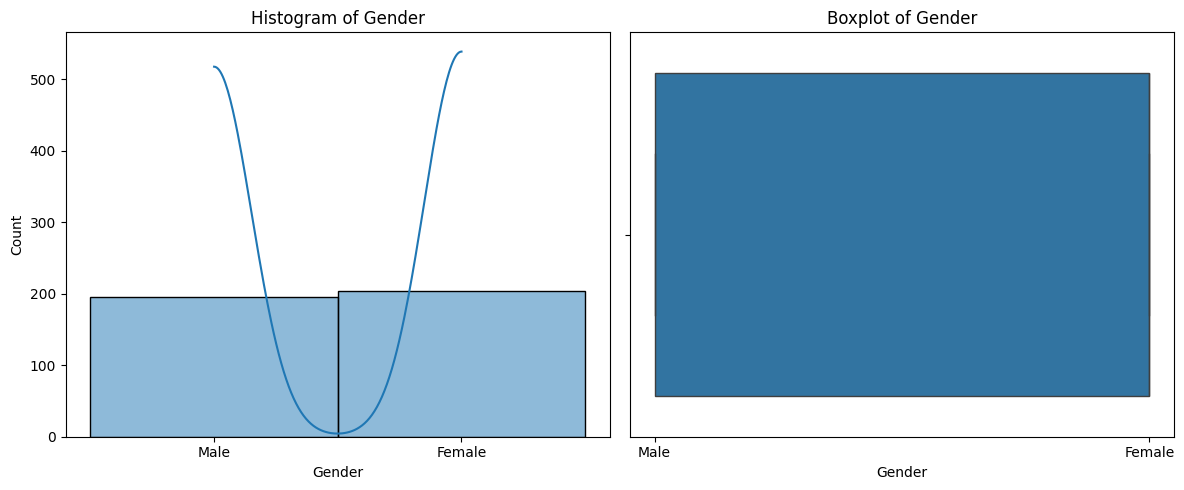

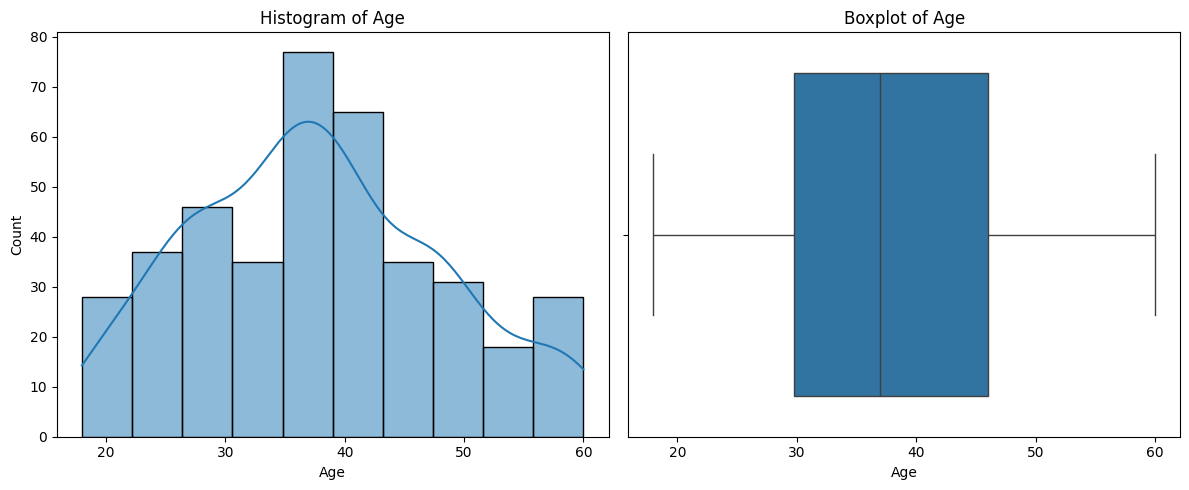

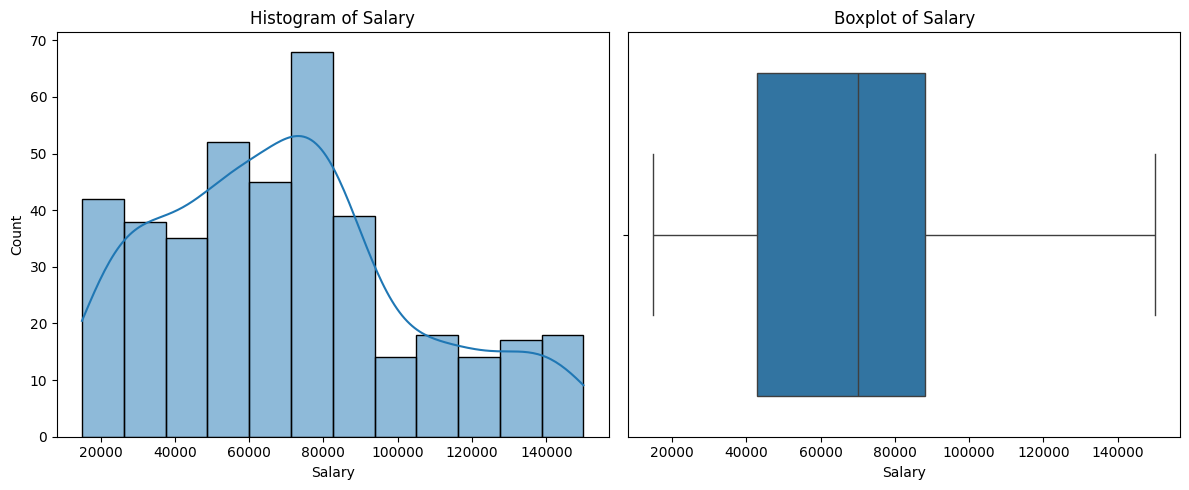

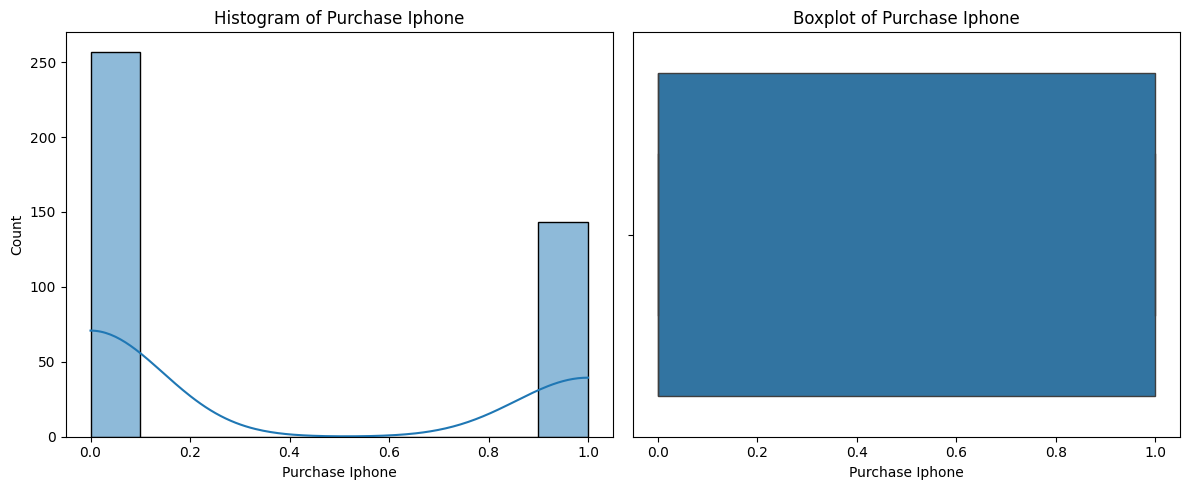

In [179]:
for i in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram (Distribution Plot)
    sns.histplot(df[i], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {i}')
    
    # Boxplot
    sns.boxplot(x=df[i], ax=axes[1])
    axes[1].set_title(f'Boxplot of {i}')

    plt.tight_layout()
    plt.show()

# B. Preprocessing

## Mapping kolom gender

In [180]:
mapping = {'Male': 0, 'Female' : 1}
df['Gender'] = df['Gender'].map(mapping)
df.head()

,Gender,Age,Salary,Purchase Iphone
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


## Melakukan pengecekan korelasi dengan pairplot (pearson) & Heatmap (Kendall tau & Spearman)

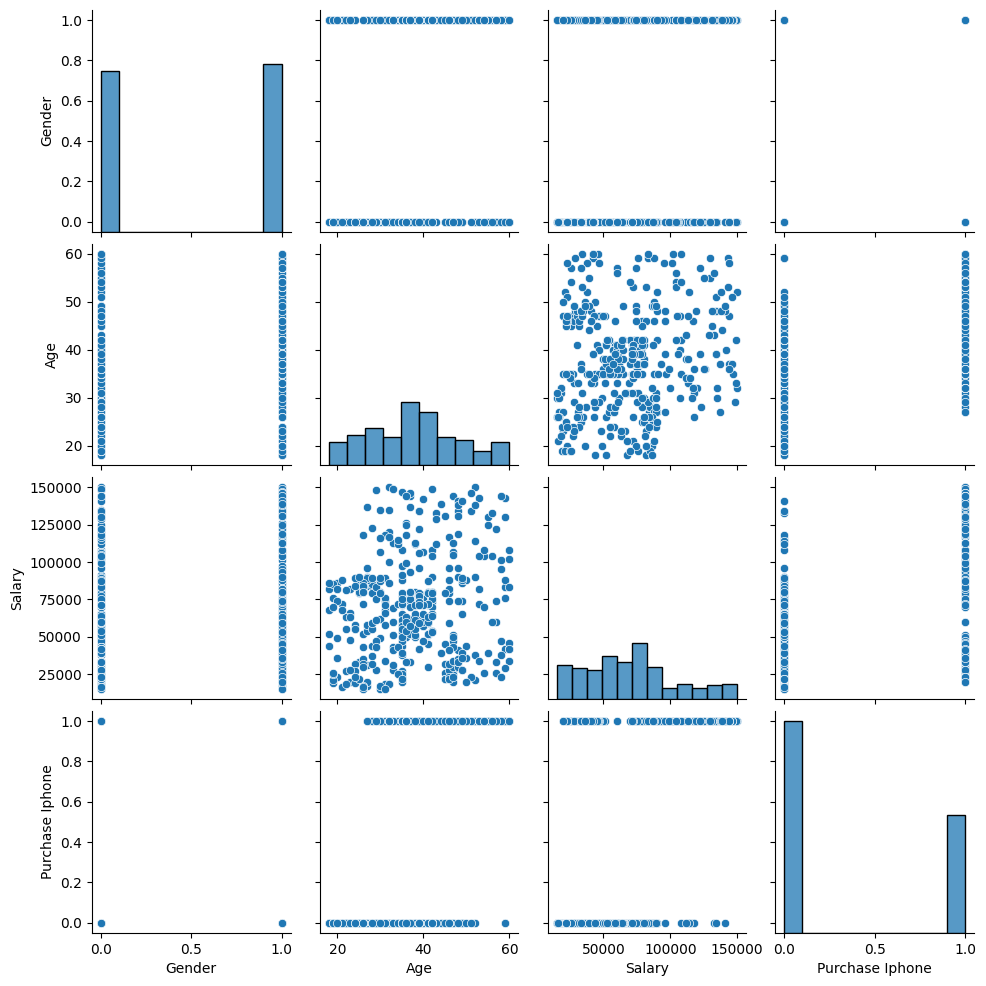

In [181]:
sns.pairplot(df)
plt.show()

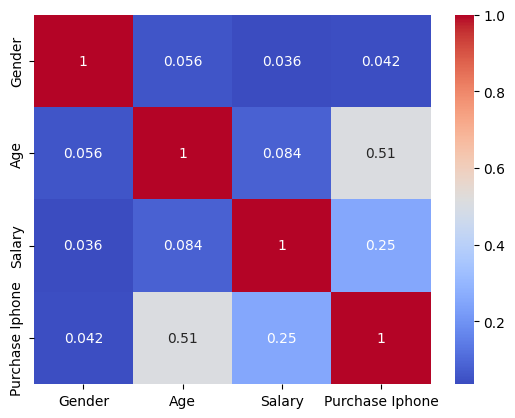

In [182]:
sns.heatmap(df.corr('kendall'),annot=True,cmap='coolwarm')
plt.show()

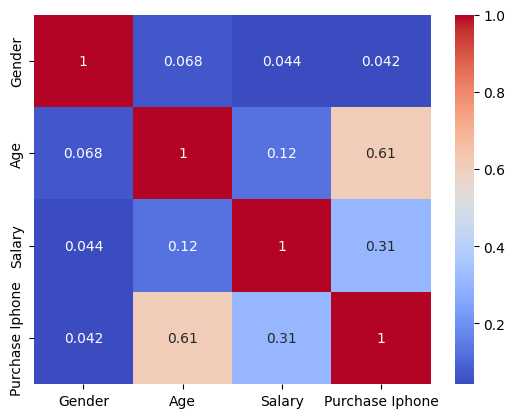

In [183]:
sns.heatmap(df.corr('spearman'),annot=True,cmap='coolwarm')
plt.show()

# C. Processing

## Initiative: 
### Karena kekurangan kolom fitur yang beragam, kami memutuskan untuk membuat beberapa kolom baru, yaitu:

### - Pengelompokan Umur (Remaja, Dewasa, Lansia)
### - Pengelompokan Salary (Rendah, Sedang, Tinggi)
### - Age Adjusted Salary-Ratio (Continuous Numerical)
### - Wealth_status berdasarkan gender dan kelompok seumuran, dengan menggabung AAS dan gender (Richer, Poorer)

### Menyalin Dataframe untuk tidak mengubah data asli

In [184]:
dfc = df.copy(deep=True)

### Pengelompokan Gaji berdasarkan Q1 dan Q3 salary

In [185]:
q1_salary = dfc['Salary'].quantile(0.25)
q3_salary = dfc['Salary'].quantile(0.75)
print(q1_salary, q3_salary)

def classify_salary(salary):
    if salary <= q1_salary:
        return 0 # Rendah
    elif salary <= q3_salary:
        return 1 # Sedang
    else:
        return 2 # Tinggi

dfc['Salary_Class'] = dfc['Salary'].apply(classify_salary)

dfc['Salary_Class'].value_counts()

43000.0 88000.0


Salary_Class
1    204
0    102
2     94
Name: count, dtype: int64

### Pengelompokan Umur (25 dan kebawah termasuk remaja, 45 dan kebawah termasuk dewasa, dan sisanya adalah lansia)

In [186]:
def classify_age(age):
    if age <= 25:
        return 0 # Remaja
    elif age <= 45:
        return 1 # Dewasa
    else:
        return 2 # Lansia
    
dfc['Age_Class'] = dfc['Age'].apply(classify_age)
dfc['Age_Class'].value_counts()

Age_Class
1    248
2    103
0     49
Name: count, dtype: int64

In [187]:
dfc.describe()

,Gender,Age,Salary,Purchase Iphone,Salary_Class,Age_Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.510000,37.655000,69742.500000,0.357500,0.980000,1.135000
std,0.500526,10.482877,34096.960282,0.479864,0.700591,0.602231
min,0.000000,18.000000,15000.000000,0.000000,0.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000,0.000000,1.000000
50%,1.000000,37.000000,70000.000000,0.000000,1.000000,1.000000
75%,1.000000,46.000000,88000.000000,1.000000,1.000000,2.000000
max,1.000000,60.000000,150000.000000,1.000000,2.000000,2.000000


### Penjelasan Age Adjusted Salary:

#### Kami mengelompokkan pembeli ke beberapa **kelompok umur**, setelah itu kami mencari **nilai tengah salary**, lalu membuat **nilai tengah itu sebagai dasar perhitungan AAS** (referensi gaji normal = 1.00) 

#### **jika AAS lebih dari 1 maka dia lebih kaya dari kelompok umurnya, dan sebaliknya**

In [188]:
median_salary_per_group = dfc.groupby('Age_Class')['Salary'].transform('median')
dfc['AAS'] = dfc['Salary'] / median_salary_per_group

dfc.head()

,Gender,Age,Salary,Purchase Iphone,Salary_Class,Age_Class,AAS
0,0,19,19000,0,0,0,0.327586
1,0,35,20000,0,0,1,0.281690
2,1,26,43000,0,0,1,0.605634
3,1,27,57000,0,1,1,0.802817
4,0,19,76000,0,1,0,1.310345


### Gender Based Wealth Status 

#### Pembuatan AAS berdasarkan Gender

In [189]:
gaas = dfc.groupby('Gender')['AAS'].median()
gaas

Gender
0    0.979444
1    1.000000
Name: AAS, dtype: float64

#### Kolom Wealth Status (1 = lebih kaya dibanding gender seumuran, 0 = lebih miskin dibanding gender seumuran)

In [190]:
dfc['Wealth_Status'] = dfc.apply(lambda x: 1 if x['AAS'] > gaas[x['Gender']] else 0, axis=1)
dfc.head()

,Gender,Age,Salary,Purchase Iphone,Salary_Class,Age_Class,AAS,Wealth_Status
0,0,19,19000,0,0,0,0.327586,0
1,0,35,20000,0,0,1,0.281690,0
2,1,26,43000,0,0,1,0.605634,0
3,1,27,57000,0,1,1,0.802817,0
4,0,19,76000,0,1,0,1.310345,1


### Pengecekan Korelasi dengan Pairplot (Pearson) dan Heatmap (Kendall Tau & Spearman)

<Figure size 1400x1200 with 0 Axes>

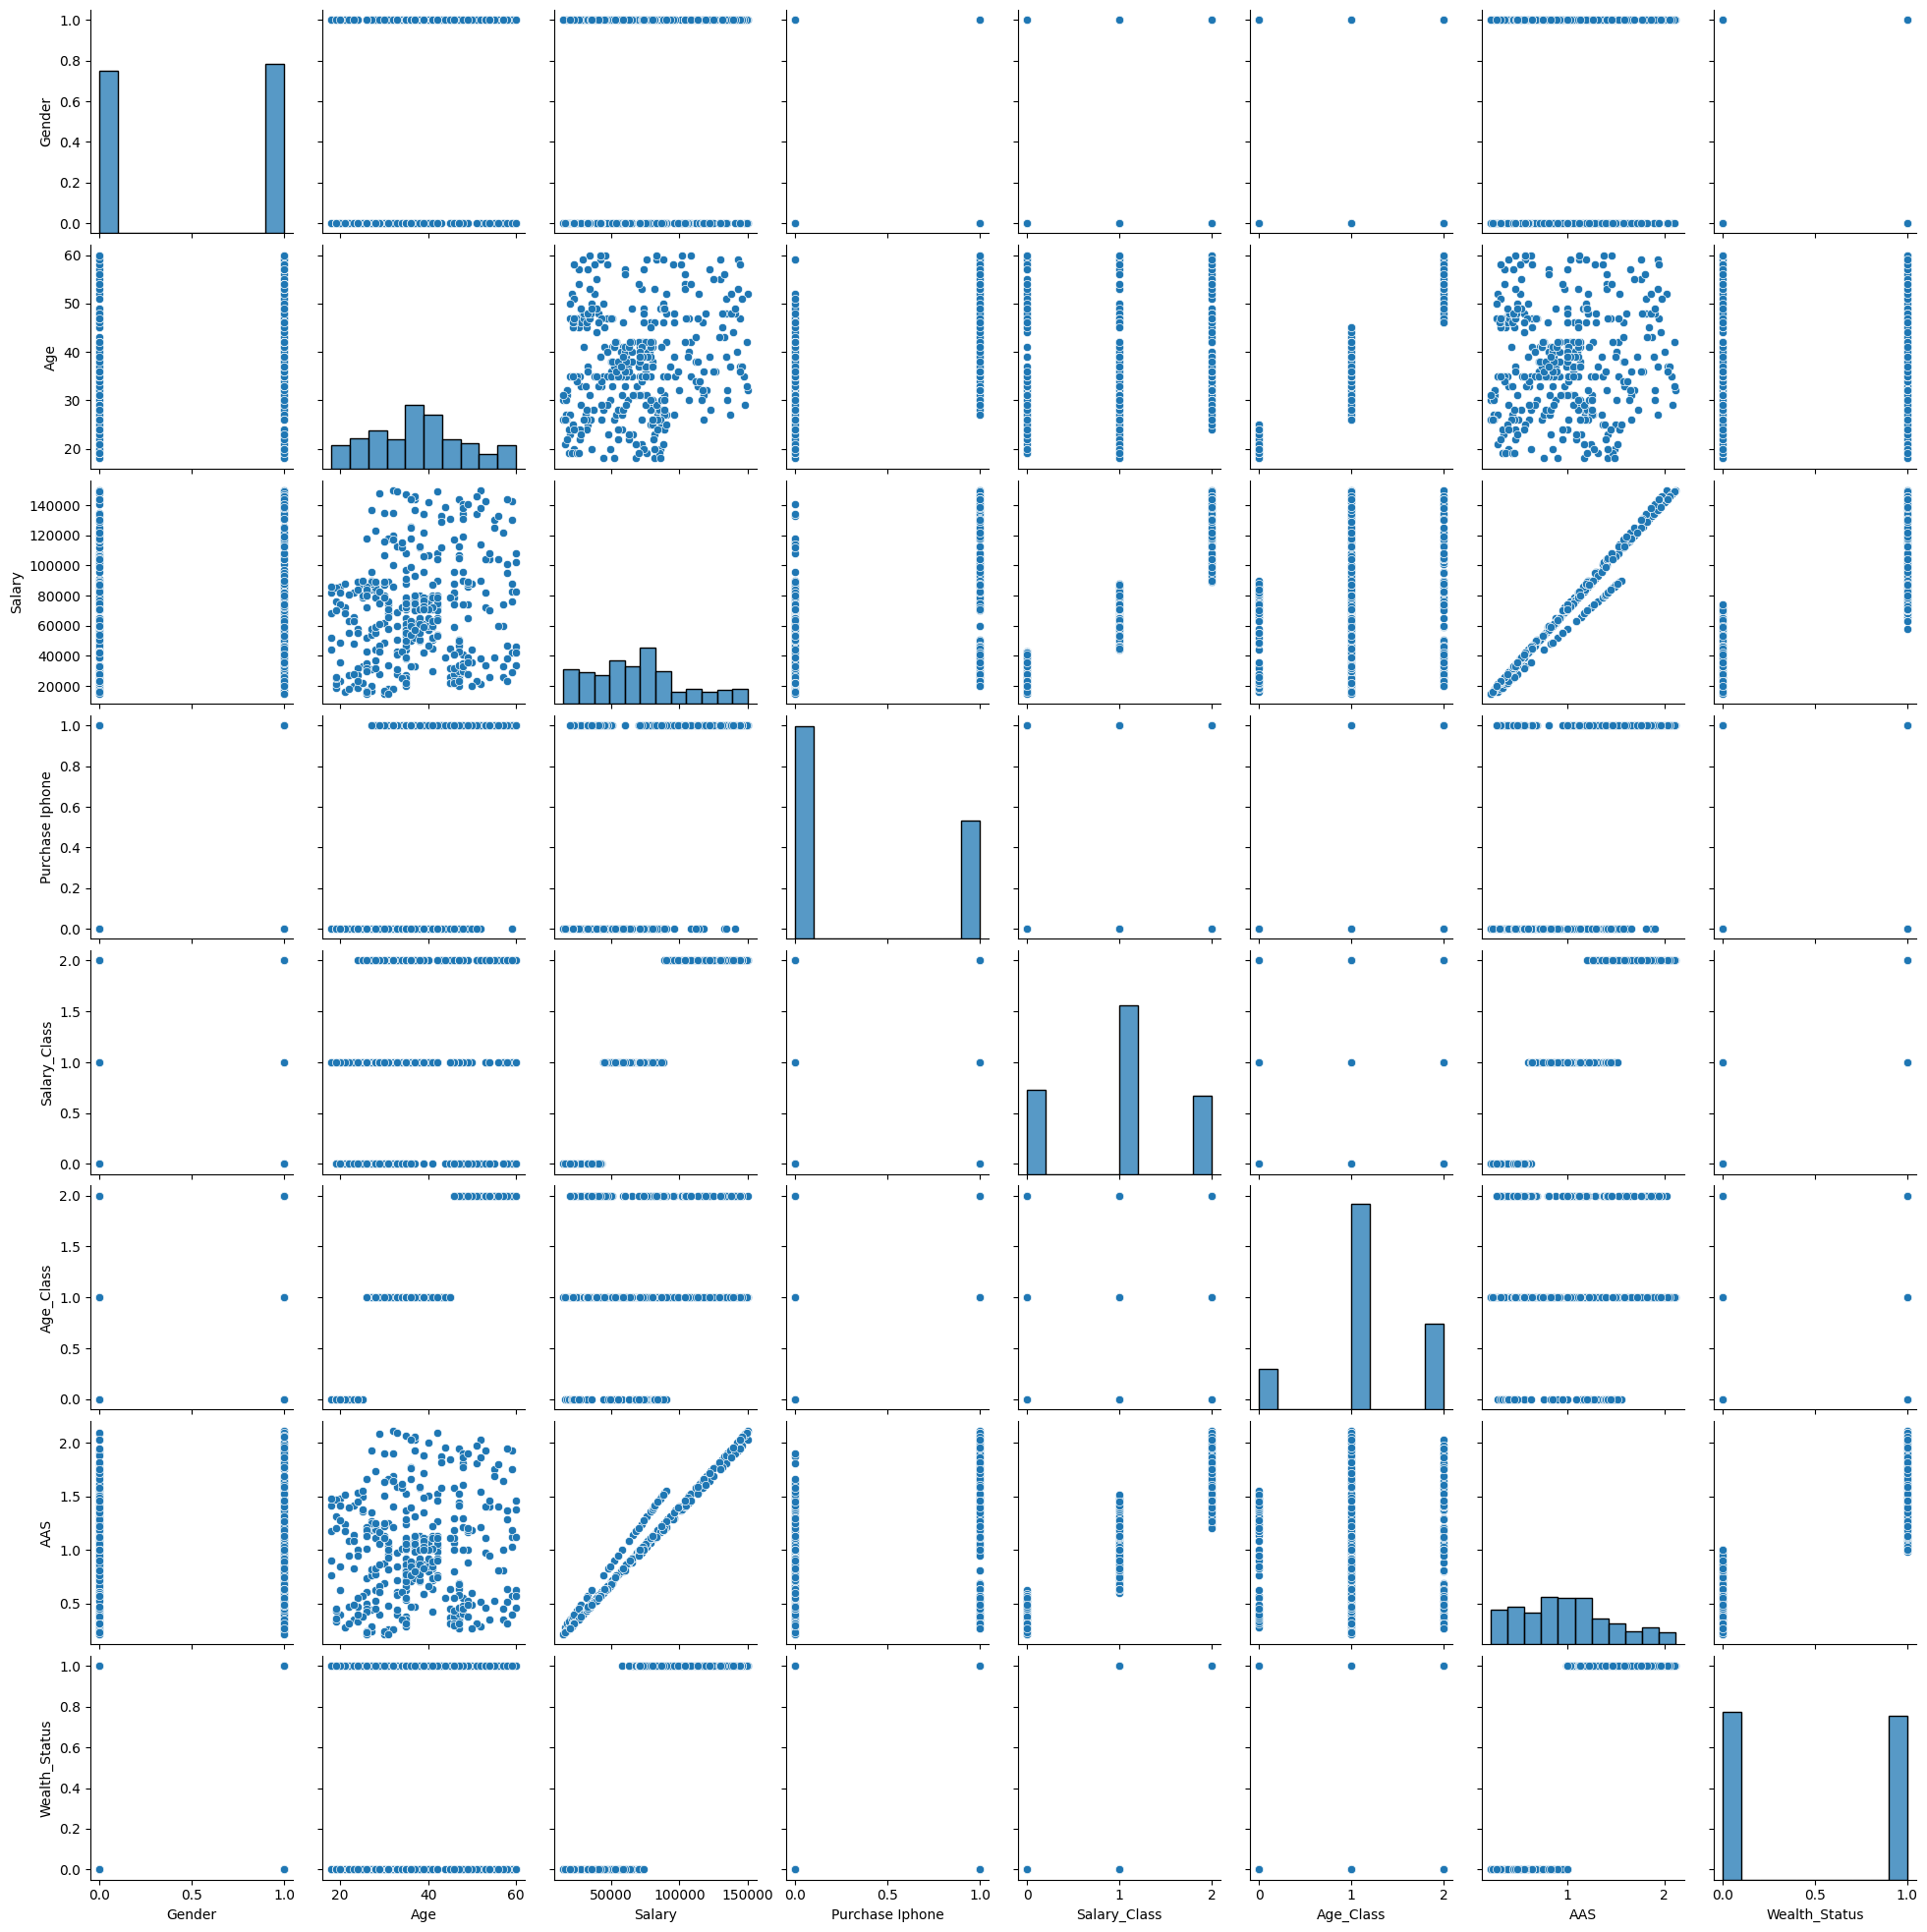

In [191]:
plt.figure(figsize=(14,12))
sns.pairplot(dfc)
plt.show()

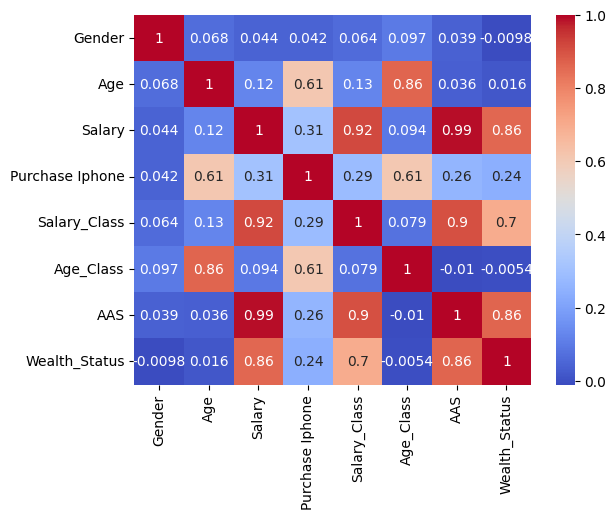

In [192]:
sns.heatmap(dfc.corr('spearman'),annot=True,cmap='coolwarm')
plt.show()

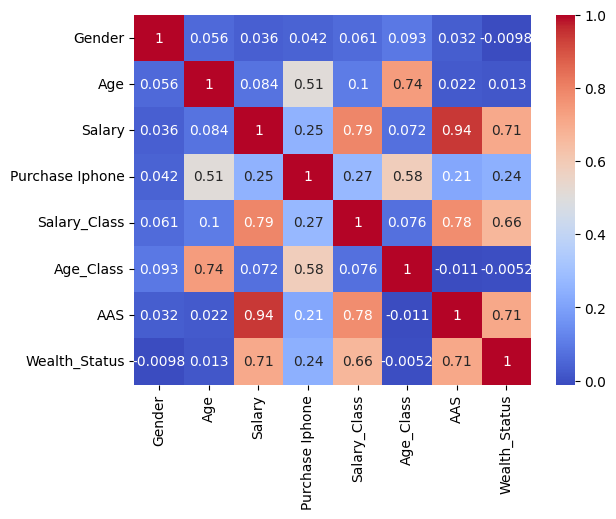

In [193]:
sns.heatmap(dfc.corr('kendall'),annot=True,cmap='coolwarm')
plt.show()

#### Karena tingginya korelasi AAS dan Salary, kita memutuskan untuk menghapus AAS dan menggunakan kolom Salary (menghindari multicollinearity)

In [194]:
dfc.drop(columns='AAS')

,Gender,Age,Salary,Purchase Iphone,Salary_Class,Age_Class,Wealth_Status
0,0,19,19000,0,0,0,0
1,0,35,20000,0,0,1,0
2,1,26,43000,0,0,1,0
3,1,27,57000,0,1,1,0
4,0,19,76000,0,1,0,1
...,...,...,...,...,...,...,...
395,1,46,41000,1,0,2,0
396,0,51,23000,1,0,2,0
397,1,50,20000,1,0,2,0
398,0,36,33000,0,0,1,0


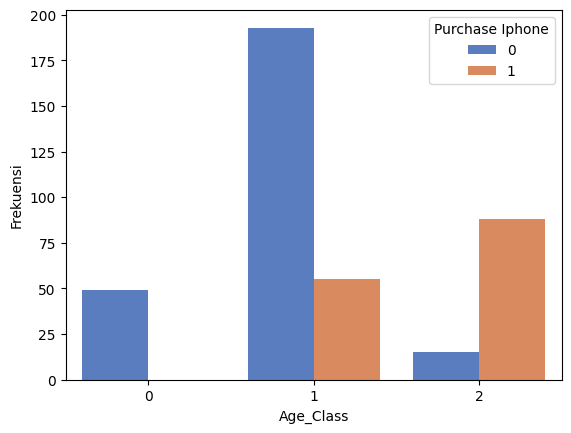

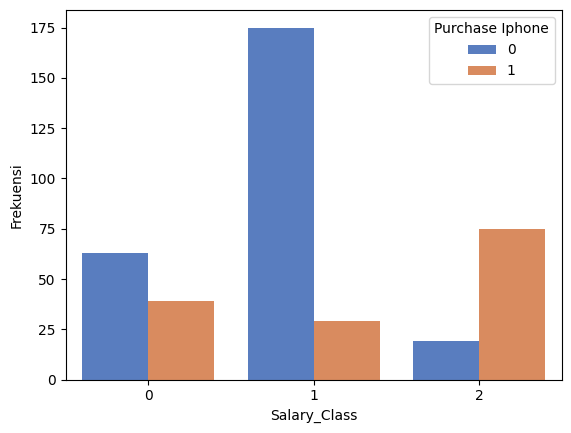

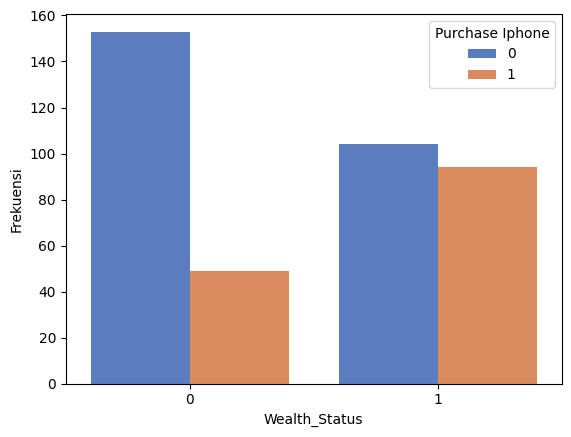

In [195]:
for col in dfc[['Age_Class', 'Salary_Class', 'Purchase Iphone','Wealth_Status']]:
    if col != 'Purchase Iphone':
        sns.countplot(data=dfc, x=col, hue='Purchase Iphone', palette='muted')
        plt.ylabel('Frekuensi')
        plt.show()

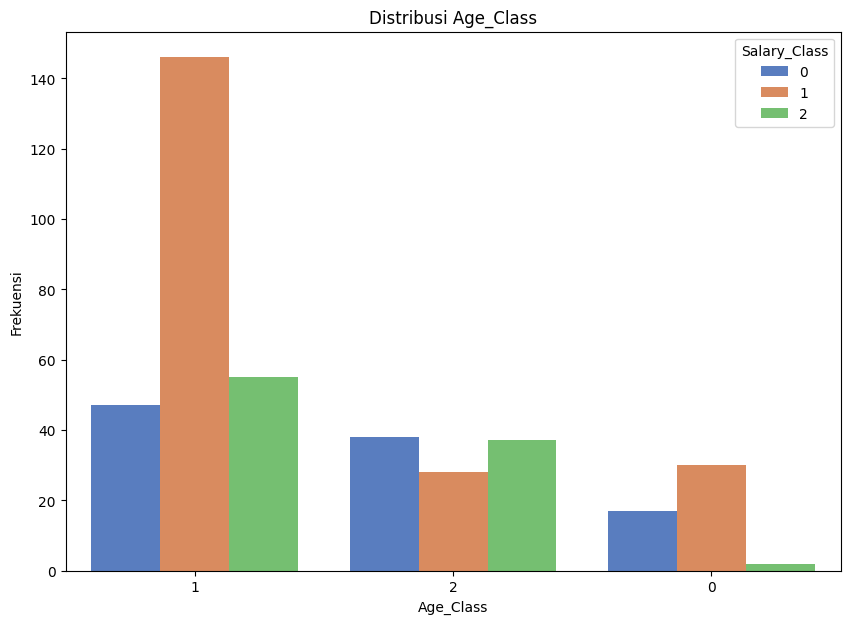

In [196]:
for col in dfc[['Age_Class']]:
    plt.figure(figsize=(10, 7))
    sns.countplot(data=dfc, x=col, palette='muted', order=dfc[col].value_counts().index, hue='Salary_Class')
    plt.title(f'Distribusi {col}')
    plt.ylabel('Frekuensi')
    plt.show()

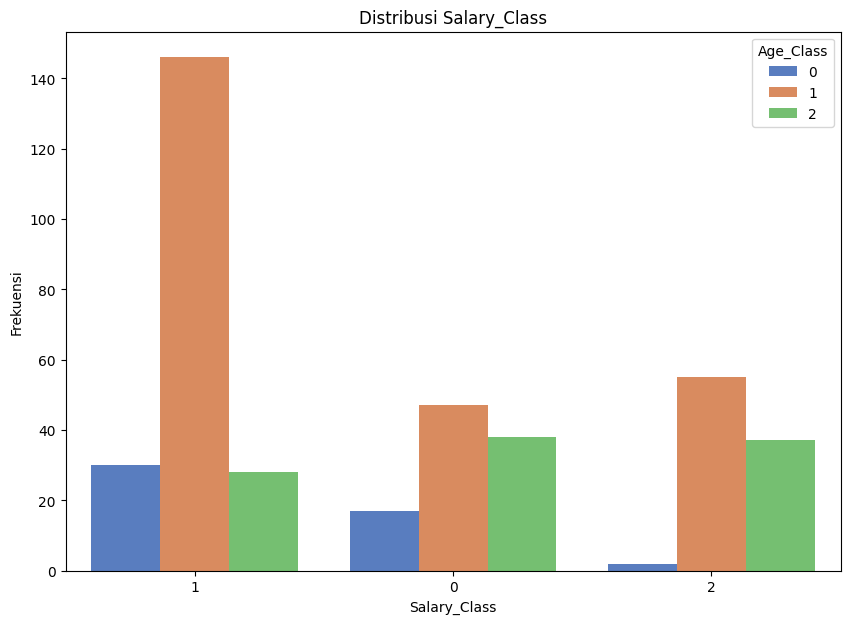

In [197]:
for col in dfc[['Salary_Class']]:
    plt.figure(figsize=(10, 7))
    sns.countplot(data=dfc, x=col, palette='muted', order=dfc[col].value_counts().index, hue='Age_Class')
    plt.title(f'Distribusi {col}')
    plt.ylabel('Frekuensi')
    plt.show()

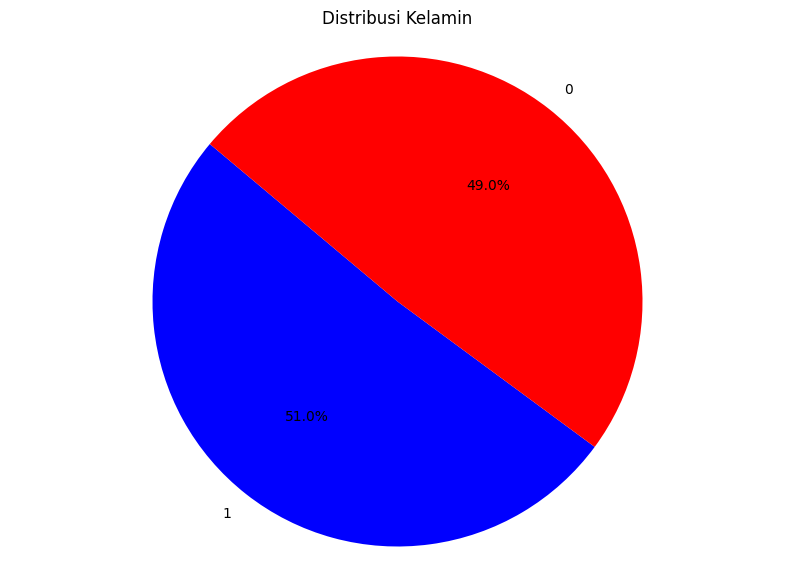

In [198]:
gender_count = dfc['Gender'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', colors=['blue', 'red'], startangle=140)
plt.title('Distribusi Kelamin')
plt.axis('equal')
plt.show()

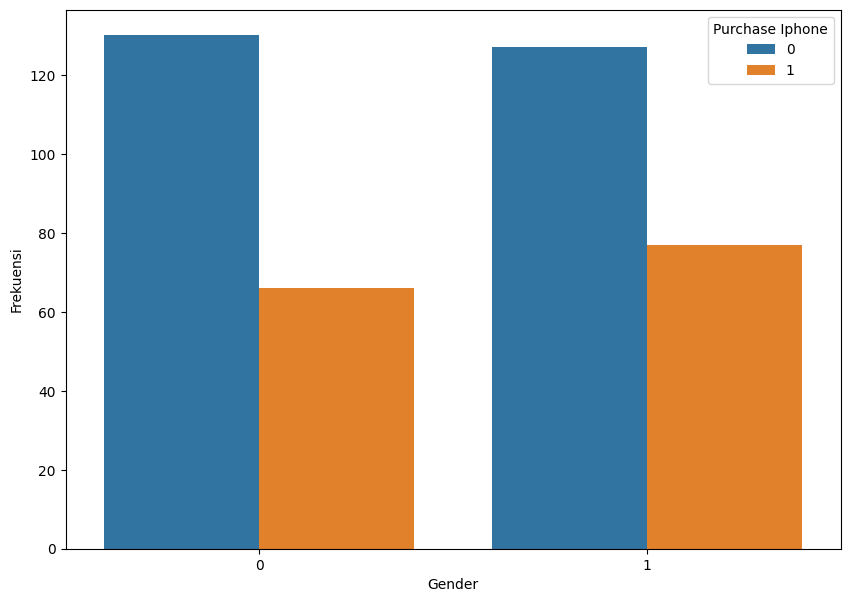

In [199]:
for col in dfc[['Gender', 'Purchase Iphone']]:
    if col != 'Purchase Iphone':
        plt.figure(figsize=(10, 7))
        sns.countplot(x=col, data=dfc, hue='Purchase Iphone')
        plt.ylabel('Frekuensi')
        plt.show()

### *Kesimpulan* :
#### - Faktor yang paling berpengaruh adalah **Gaji** dan **Umur**
#### - Orang dewasa dengan gaji sedang kemungkinan besar tidak akan membeli iphone
#### - Orang dewasa dan orang tua dengan gaji tinggi kemungkinan besar akan membeli iphone

# D. Modelling

In [200]:
dfc.drop(columns=['Gender'],inplace=True)
dfc.head()

,Age,Salary,Purchase Iphone,Salary_Class,Age_Class,AAS,Wealth_Status
0,19,19000,0,0,0,0.327586,0
1,35,20000,0,0,1,0.281690,0
2,26,43000,0,0,1,0.605634,0
3,27,57000,0,1,1,0.802817,0
4,19,76000,0,1,0,1.310345,1


In [201]:
x = dfc.drop(columns='Purchase Iphone')
y = dfc['Purchase Iphone']

In [202]:
y.value_counts()

Purchase Iphone
0    257
1    143
Name: count, dtype: int64

In [232]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

x_train, x_test, ytr, yte = train_test_split(x, y, test_size=0.2,random_state=42)

scaler = MinMaxScaler()
xtr_scaled = scaler.fit_transform(x_train)
xte_scaled = scaler.transform(x_test)

In [233]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting method
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}
param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Splitting criteria
    'max_depth': [None, 5, 10, 20],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 5],  # Min samples per leaf
    'max_features': ['sqrt', 'log2', None]  # Features to consider for best split
}
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 10, 20],  # Max depth
    'min_samples_split': [2, 5, 10],  # Min samples to split
    'min_samples_leaf': [1, 2, 5],  # Min samples per leaf
    'max_features': ['sqrt', 'log2'],  # Feature selection
    'bootstrap': [True, False]  # Bootstrap sampling
}
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Only solvers that support l1, l2, elasticnet
    'max_iter': [500, 1000, 2000]  # Increased max iterations
}

In [234]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [235]:
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(xtr_scaled, ytr)

print("Best Parameters:", grid_knn.best_params_)
print("Best Accuracy:", grid_knn.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best Accuracy: 0.90625


In [236]:
from sklearn.model_selection import GridSearchCV

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(xtr_scaled, ytr)

print("Best Parameters:", grid_dt.best_params_)
print("Best Accuracy:", grid_dt.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Accuracy: 0.903125


In [237]:
from sklearn.model_selection import GridSearchCV

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(xtr_scaled, ytr)

print("Best Parameters:", grid_rf.best_params_)
print("Best Accuracy:", grid_rf.best_score_)

Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.9125


In [238]:
from sklearn.model_selection import GridSearchCV

grid_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='accuracy', error_score=np.nan)
grid_lr.fit(xtr_scaled, ytr)

print("Best Parameters:", grid_lr.best_params_)
print("Best Accuracy:", grid_lr.best_score_)

c:\Users\korez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\korez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'C': 1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.8625


In [239]:
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='uniform')
decision_tree = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth= 5, max_features='sqrt', min_samples_leaf= 1, min_samples_split=5)
random_forest = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=5,bootstrap=True, criterion='gini',max_features='sqrt',min_samples_leaf=5,min_samples_split=2)
logistic_regression = LogisticRegression(random_state=42, C= 1, max_iter= 1000, penalty='l1', solver='liblinear')

knn.fit(xtr_scaled, ytr)
decision_tree.fit(xtr_scaled, ytr)
random_forest.fit(xtr_scaled, ytr)
logistic_regression.fit(xtr_scaled, ytr)


LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [240]:
knn_pred = knn.predict(xte_scaled)
dt_pred = decision_tree.predict(xte_scaled)
rf_pred = random_forest.predict(xte_scaled)
lr_pred = logistic_regression.predict(xte_scaled)

In [241]:
# Function to print accuracy & classification report
def evaluate_model(name, y_true, y_pred):
    print(f"{name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("-" * 50)

# Evaluate each model
evaluate_model("KNeighborsClassifier", yte, knn_pred)

KNeighborsClassifier
Accuracy: 0.9375
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80

--------------------------------------------------


In [242]:
evaluate_model("Decision Tree", yte, dt_pred)

Decision Tree
Accuracy: 0.9125
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.86      0.89      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80

--------------------------------------------------


In [243]:
evaluate_model("Random Forest", yte, rf_pred)

Random Forest
Accuracy: 0.9125
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80

--------------------------------------------------


In [244]:
evaluate_model("Logistic Regression", yte, lr_pred)

Logistic Regression
Accuracy: 0.9250
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        52
           1       0.96      0.82      0.88        28

    accuracy                           0.93        80
   macro avg       0.93      0.90      0.91        80
weighted avg       0.93      0.93      0.92        80

--------------------------------------------------


# E. Kesimpulan dan Visualisasi Akhir

## Kesimpulan Studi Kasus

### 1. Mencari pola yang berpengaruh ke pembelian iphone, bisa terdiri dari beberapa kolom

#### Dari Visualisasi yang kami lakukan, kami menemukan bahwa:

##### 1. **Gaji adalah faktor yang penting, dan dapat berkolerasi dengan kolom lain**. Contoh: Pembeli dengan gaji sedang akan berpikir tentang biaya hidup sebelum beli, sementara orang yang memiliki **gaji tinggi tidak berpikir panjang untuk membeli iphone**
##### 2. **Orang tua terlihat lebih sering membeli iphone dibanding dengan grup umur lain**, ini dikarenakan batasan yang dimiliki grup umur lainnya. Contoh, remaja tidak memiliki uang yang banyak. **Alasan data ini dapat ditemukan jika kita menghitung fakta bahwa orang tua lebih memilih fitur yang simpel dan stabil**, layaknya **fitur-fitur yang disediakan oleh IOS milik iphone**, serta mereka memiliki **uang pensiunan yang cukup untuk membeli barang mewah** seperti iphone.
##### 3. Dari kolom Wealth Status, dapat ditemukan bahwa beberapa **orang yang tergolong tidak kaya juga membeli iphone**. Meskipun lebih sedikit dibanding dengan yang tidak membeli iphone, grup tidak kaya ini perlu diperhatikan karena bisa dimanfaatkan oleh perusahaan untuk membuat **targeted marketing yang sangat mudah mempengaruhi grup** ini. Mengapa bisa mudah mempengaruhi? Karena mereka membeli berdasarkan perasaan, yang dapat tumbuh menjadi loyalitas yang dapat di eksploitasi

### 2. Memberi saran untuk periklanan bagi bisnis berdasarkan pola yang ditemukan

#### Dari pengolahan data yang kami lakukan, kami menyarankan perusahaan untuk:

##### 1. **Membuat Targeted Marketing kepada pelanggan dengan Wealth Status yang tidak kaya, dan pernah membeli iphone**. Grup pelanggan ini memiliki **rasa loyalitas tinggi** kepada Apple, dan **memiliki potensi untuk membeli produk lain dari Apple**. Meskipun **kelompok ini tidak terlalu kaya** dibanding dengan teman sebayanya, *memilih untuk membeli iphone*, menunjukkan **Loyalitas ataupun pemikiran *Fear of Missing Out (FOMO)***. Perusahaan disarankan melakukan **penggiringan trend ketika ada produk iphone yang terbaru** (namun masih bisa dijangkau oleh grup ini) **di sosial media, agar mereka akan terppengaruh** oleh influencer dan akan **membeli iphone terbaru**.
##### 2. **Membuat Targeted Marketing kepada pelanggan dengan gaji yang tinggi**. Telah dibuktikan oleh visualisasi bahwa **kelompok dengan gaji yang tinggi konsisten membeli iphone** dan berkemungkinan besar **tidak berpikir panjang sebelum membeli** iphone. Contoh: **Membuat versi iphone khusus untuk kelompok menengah keatas dengan iklan yang khusus, memasarkan produk ini sebagai produk untuk orang tertentu.**
##### 3. **Membuat fitur software atau hardware yang menarik bagi kedua kelompok customer yang kami identifikasi**, lalu **mengiklankan fitur tersebut kepada kedua kelompok tersebut**. Hal ini dapat meningkatkan penjualan dan jangkauan market apple kepada kelompok yang lebih luas.

### - Pengelompokan customer dari pola data yang ditemukan

#### Kita membuat beberapa pengelompokan pembeli dari pola data yang ditemukan, proses pengelompokan ini dapat ditemukan di bagian processing di file notebook ini.

##### 1. **Kelompok pembeli konsisten** (Sering ditemukan dengan **gaji yang tinggi** dari semua umur, namun terdeteksi **lebih banyak datang dari orang dewasa**).
##### 2. **Kelompok dengan Loyalitas tinggi atau FOMO** (Ditemukan dengan pelanggan yang membeli iphone, namun memiliki **kekayaan yang lebih rendah dibanding teman sebayanya**), **perlu dilakukan analisis lebih lanjut untuk membedakan kaum** yang memiliki Loyalitas tinggi atau sekedar ikut-ikutan beli iphone karena *trendy*.
##### 3. **Kumpulan Umum yang tidak membeli iphone karena memiliki hidup dengan pengeluaran sederhana**, contohnya: Orang dewasa yang memiliki gaji sedang sering tidak membeli iphone dikarenakan mereka memiliki tanggungan finansial atau bentuk lain yang harus dipikirkan.

### 3. Model yang kami pilih : **Random Forest Classifier**

#### Kami memilih random forest dikarenakan dia memiliki keputusan memilih yang lebih "rumit" dibanding dengann model lain, sebagai contoh, KNN Classifier hanya melakukan klasifikasi berdasarkan kelas yang paling mirip dengan data lain. Sementara random forest adalah percabangan dari decision tree, dia dibuat untuk lebih tahan terhadap overfitting, dan dapat memberikan hasil yang konsisten dai semua eksperimen yang kami coba.

#### Cara kerja dari Random forest sendiri adalah membuat banyak keputusan secara acak untuk membuat keputusan akhir yang mengklasifikasikan sebuah data baru.

## Visualisasi Akhir 

### Visualisasi tiap kolom yang berpengaruh kepada keputusan pembeli iphone dan seberapa kuat pengaruhnya

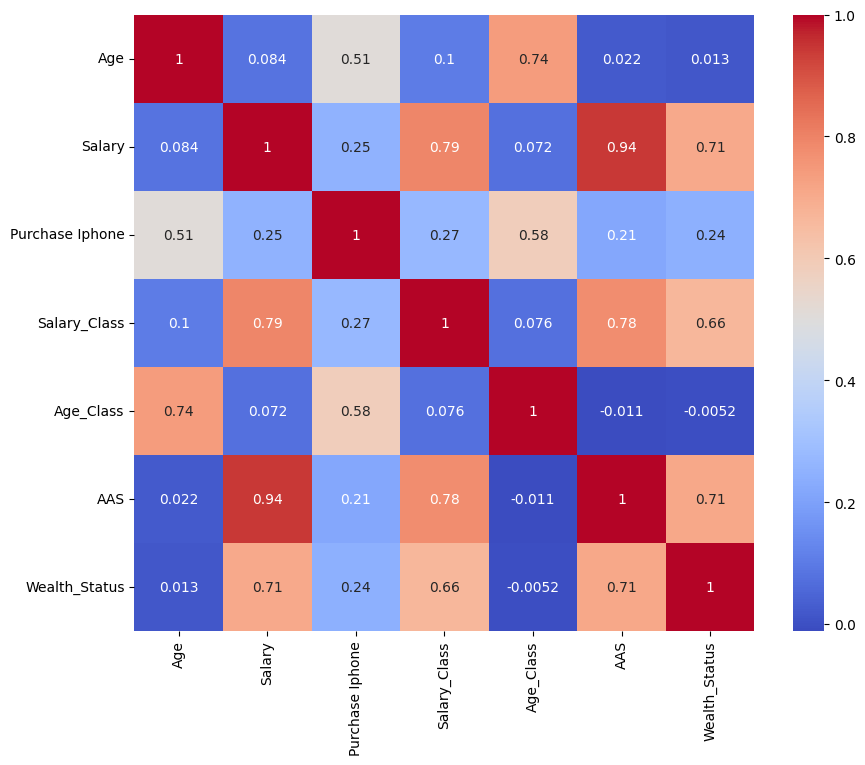

In [245]:
plt.figure(figsize=(10,8))
sns.heatmap(dfc.corr('kendall'),annot=True,cmap='coolwarm')
plt.show()

### Bar Chart untuk menunjukkan informasi dari kolom kelompok umur, kelompok gaji, dan status kekayaan dan jumlah yang membeli iphone dari tiap kolom

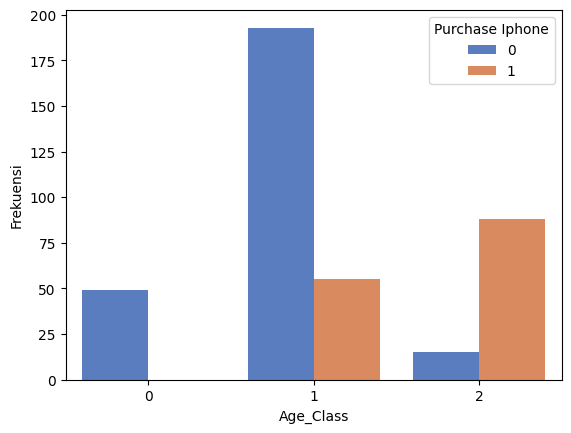

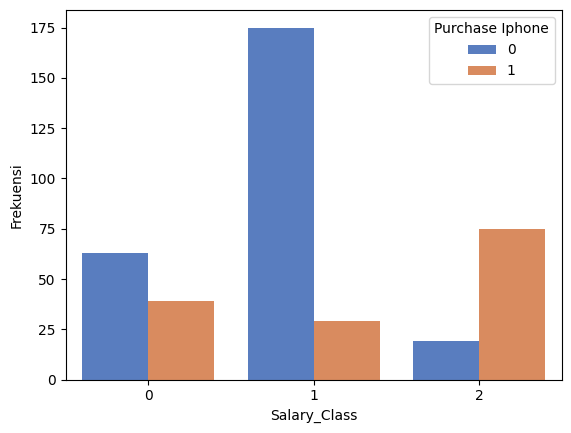

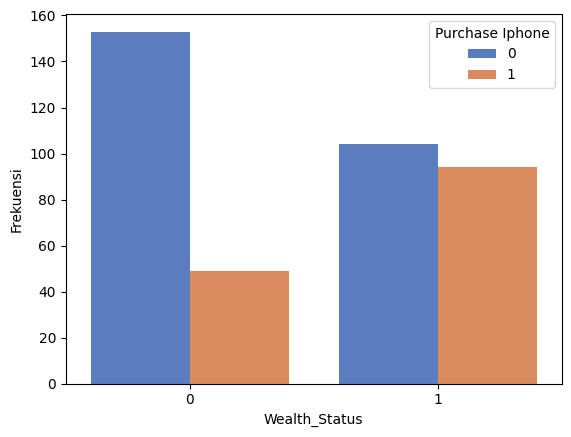

In [246]:
for col in dfc[['Age_Class', 'Salary_Class', 'Purchase Iphone','Wealth_Status']]:
    if col != 'Purchase Iphone':
        sns.countplot(data=dfc, x=col, hue='Purchase Iphone', palette='muted')
        plt.ylabel('Frekuensi')
        plt.show()